<a href="https://colab.research.google.com/github/Laiba-saeed92/Deep_Learning_projects/blob/main/ANN_proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##CHURN MODELLING PREDICTION USING NEURAL NETWORKS
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
!pip install -q keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.4 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch

In [ ]:
dataset= pd.read_csv('/content/drive/MyDrive/Datasets/Churn_Modelling.csv')

In [ ]:
X= dataset.iloc[:, 3:13]
y=dataset.iloc[:, 13]


In [ ]:
geography=pd.get_dummies(X['Geography'], drop_first=True)
gender=pd.get_dummies(X['Gender'], drop_first=True)

In [ ]:
X=X.drop(['Geography', 'Gender'], axis=1)

In [ ]:
X=pd.concat([X, geography, gender], axis=1)

In [ ]:
X.head()
#X.shape

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
print(y)
y.shape

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


(10000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0, test_size=0.2)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)


In [ ]:
#PART#02 BUILD AN ANN

In [ ]:
import keras
from keras.models import Sequential #for forwared feedback propagation
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [ ]:
classifier= Sequential()
#Adding input layer and the first hidden  layer
classifier.add(Dense(units=6, kernel_initializer='he_normal', activation='relu', input_dim=11)) #kernel inialization inilizes weights he normal technique othe is he uniform
#Adding the second hidden  layer
classifier.add(Dense(units=6, kernel_initializer='he_normal', activation='relu'))
#Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid')) #Also called Xavier initialization, helps keep gradients stable — works well with sigmoid and tanh activations
#Compiling the ANN model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Fitting the ANN to the training set
model_history=classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100) # validation_split means 33% of your training data will be used as validation set (for checking performance on unseen data during training)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7003 - loss: 0.5902 - val_accuracy: 0.7940 - val_loss: 0.4875
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7995 - loss: 0.4789 - val_accuracy: 0.7940 - val_loss: 0.4591
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7975 - loss: 0.4503 - val_accuracy: 0.7955 - val_loss: 0.4416
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7919 - loss: 0.4404 - val_accuracy: 0.7997 - val_loss: 0.4319
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8131 - loss: 0.4177 - val_accuracy: 0.8122 - val_loss: 0.4246
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8146 - loss: 0.4088 - val_accuracy: 0.8164 - val_loss: 0.4164
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8207 - loss: 0.4130 - val_accuracy: 0.8228 - val_loss: 0.4060
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8385 - loss: 0.3914 - val_accu

In [ ]:
#list all data in history
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
model.layers[0].get_weights()

NameError: name 'model' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

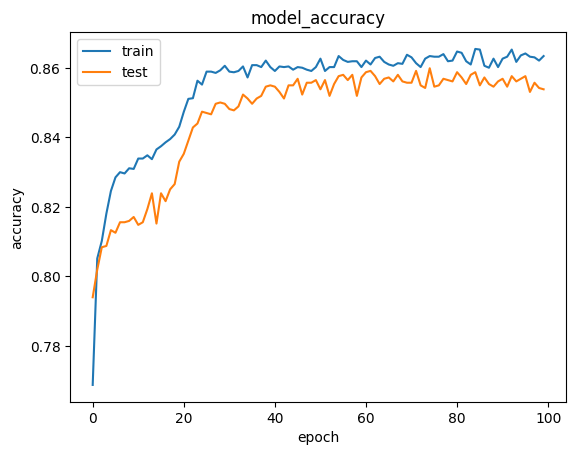

In [ ]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show

In [ ]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)


[[1511   84]
 [ 195  210]]


In [ ]:
from sklearn.metrics import accuracy_score
score= accuracy_score(y_pred, y_test)
print(score)

0.8605
